# Random Variables

- A statistical experiments produces an outcome in a sample space. The probability function assigns a value between 0 and 1 to an event given a sample space: $$P: A\in A \rightarrow P(A)\in[0,1]$$ 
<p>&nbsp;</p>
- **However,  frequently we are more interested in a number that summarizes the outcomes.** 
<p>&nbsp;</p>
- **For instance,** if we randomly select a person with a fever and provide her with a dosage of medicine, the sample space might be the set of all people who currently have a fever. More than calculate the probability of certain event, we are interested in the summary value of **how much did the temperature of the patient decrease**.

### Definition

Let $S$ be the sample space of an experiment. A *random variable* is a function $X$ mapping from $S$ to the real (natural) numbers.

#### Relationship between an event from the sample space and the random variable
suppose $X$ is a *random variable*. The events in the sample space are defined by the values of $X$. For instance $X=2$ is the event consisting of all the outcomes $s \in S$ such that $X(s)=2$.

### Example: 

In [5]:
suppressWarnings(library(stringr))

In [15]:
#Suppose that 3 coins are tossed: the sample space is:
S=c('HHH','HHT','HTH','HTT','THH','THT','TTH','TTT')


#The random variable X can be defined as: number of heads observed. Then X is a function mapping from S to the Naturals
X<-function(S){
    str_count(S,'H')
}

X(S)

[1] 3 2 2 1 2 1 1 0

We can use the connection between the random variable and the sample space to find probabilities based on the *random variable* $X$. For instance:

$$P(X=2)=P(\{HHT,HTH,THH\})=\frac{3}{8}$$


In [10]:
mean(X(S)==2)

[1] 0.375

In [17]:
E<-sample(S,100,replace=TRUE)
E_X<-X(E)
E
E_X

[1] "THT" "HHH" "HHH" "THH" "HTT" "HTT" "THH" "HHH" "HTT" "THT" "TTH" "TTH"
 [13] "HHT" "HHH" "HHT" "HTT" "TTH" "THT" "THT" "HTH" "HTH" "HTH" "HTH" "HHH"
 [25] "THT" "THT" "HTT" "TTT" "TTT" "HHT" "TTT" "TTH" "HHH" "HTT" "TTT" "TTH"
 [37] "TTH" "TTT" "HHT" "TTH" "HHT" "TTH" "HHH" "HTH" "THH" "TTT" "HTT" "HTH"
 [49] "HHT" "HHT" "HTT" "TTH" "HTH" "TTH" "HHH" "HTH" "THT" "THH" "THT" "HHH"
 [61] "HHH" "HTH" "THH" "TTH" "TTH" "HTH" "TTH" "HHH" "HTT" "HTT" "TTH" "TTT"
 [73] "THT" "HTT" "THT" "HHH" "THH" "TTT" "HTT" "TTT" "TTT" "HHT" "TTH" "HTT"
 [85] "HHT" "THT" "HHH" "THT" "HTH" "TTT" "TTH" "HTH" "TTH" "THH" "TTH" "TTH"
 [97] "TTH" "THT" "HTH" "HTH"

[1] 1 3 3 2 1 1 2 3 1 1 1 1 2 3 2 1 1 1 1 2 2 2 2 3 1 1 1 0 0 2 0 1 3 1 0 1 1
 [38] 0 2 1 2 1 3 2 2 0 1 2 2 2 1 1 2 1 3 2 1 2 1 3 3 2 2 1 1 2 1 3 1 1 1 0 1 1
 [75] 1 3 2 0 1 0 0 2 1 1 2 1 3 1 2 0 1 2 1 2 1 1 1 1 2 2

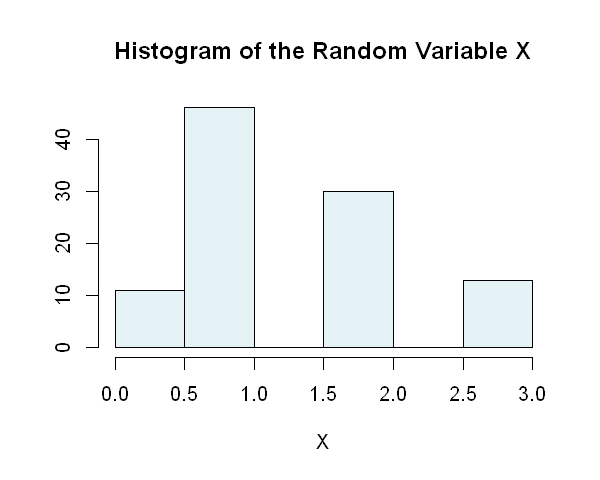

In [29]:
c1 <- rgb(173,216,230,max = 255, alpha = 80, names = "lt.blue")

h1<-hist(E_X, breaks=5, ann=FALSE,col=c1)
options(repr.plot.width=5, repr.plot.height=4)
title(main="Histogram of the Random Variable X")
title(xlab="X")

# Some Probability Distributions

### The Binomial Probability Distribution

Apply to situations involving a series of independent and identical trials ($k$), where each trial can have only one of two possible outcomes. One of the outcomes happens with probability $p$ and the other $1-p$.

$$f(k,n,p)=P(X=k;n,p){n \choose x}p^{k}(1-p)^{n-k}$$

In [108]:
suppressWarnings(library('ggplot2','dplyr'))

In [82]:
#The function dbinom returns the probability of x given a number of trials (k) and a probability (p)

b<-dbinom(1:20, 20, 0.5)
b
round(sum(b),5)


[1] 1.907349e-05 1.811981e-04 1.087189e-03 4.620552e-03 1.478577e-02
 [6] 3.696442e-02 7.392883e-02 1.201344e-01 1.601791e-01 1.761971e-01
[11] 1.601791e-01 1.201344e-01 7.392883e-02 3.696442e-02 1.478577e-02
[16] 4.620552e-03 1.087189e-03 1.811981e-04 1.907349e-05 9.536743e-07

[1] 1

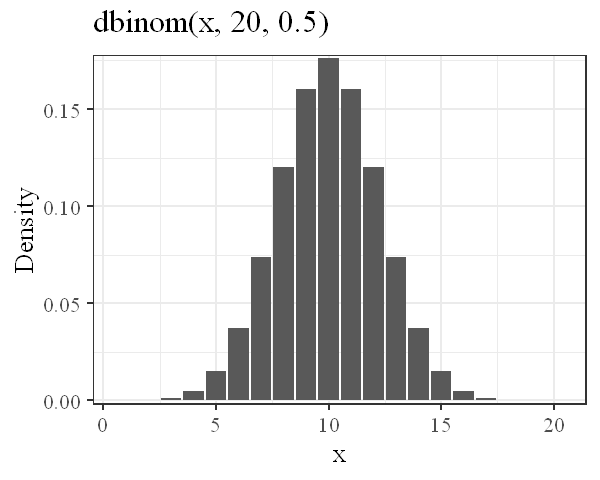

In [83]:
#Create dataframe containing the sequence from 1 to 20 and the associated values for the binomial
df <- data.frame(x = 1:20, y = b)

plot1 <- ggplot(df, aes(x = x, y = y)) + geom_bar(stat = "identity") + 
  scale_y_continuous(expand = c(0.01, 0)) + xlab("x") + ylab("Density") + 
  labs(title = "dbinom(x, 20, 0.5)") + theme_bw(16, "serif") + 
  theme(plot.title = element_text(size = rel(1.2), vjust = 1.5))

print(plot1)

### The Hypergeometric Distribution

This distribution formalizes the urn problems that frequented the probability section. 

*Suppose an urn contains m white balls and n black balls, where m +n = N. Imagine drawing k balls from the urn one at a time without replacing any of the balls selected. At each drawing we record the color of the ball removed. The question is, what is the probability that exactly x white balls are included among the k that are removed?*

The experiment is similar to the binomial. The difference is that because the samples are taken **without replacement**, each drawing is not an independent trial.

$$f(k,n,N,K)=P(X=x)=\frac{{m \choose x}{n \choose k-x}}{{n+m \choose k}}$$

- m is the number of white balls in the urn.
- n is the number of black balls in the urn.
- k the number of balls drawn from the urn

In [105]:
#function phyper(x, m, n, k)
#Take k=6 balls where there are m=3 white balls and n=7 black balls. What is the probability of getting exactly x=2 white balls

phyper(2,3,7,6)

[1] 0.8333333

In [109]:
x = 14
m = 70
n = 30
k = 20
dhyper(x = x, m = m, n = n, k = k)

options(scipen = 999, digits = 2) # sig digits

density = dhyper(x = 1:20, m = m, n = n, k = k)
data.frame(red = 1:20, density) %>%
  mutate(red14 = ifelse(red == 14, "x = 14", "other")) %>%
ggplot(aes(x = factor(red), y = density, fill = red14)) +
  geom_col() +
  geom_text(
    aes(label = round(density,2), y = density + 0.01),
    position = position_dodge(0.9),
    size = 3,
    vjust = 0
  ) +
  labs(title = "PMF of X = x Red Balls",
       subtitle = "Hypergeometric(k = 20, M = 70, N = 30)",
       x = "Number of red balls (x)",
       y = "Density")

[1] 0.21

ERROR: Error in mutate(., red14 = ifelse(red == 14, "x = 14", "other")): could not find function "mutate"
